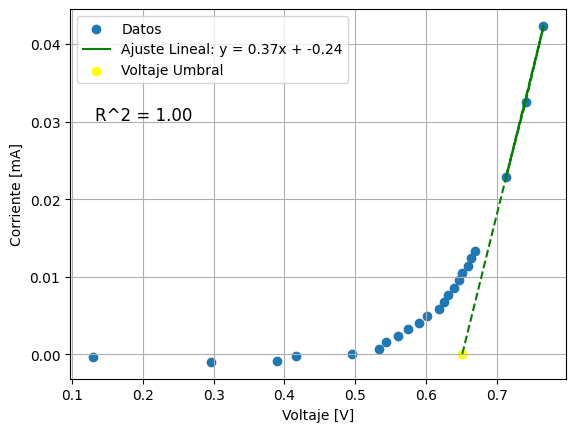

Pendiente (m): 0.3669559032716916
Ordenada al Origen (b): -0.2389473684210518
Voltaje Umbral: 0.6511609877117492


In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# Carga los datos desde el archivo CSV
data = pd.read_csv('C:\\Users\\madro\\OneDrive\\Documents\\Python-\\electronica\\1Diodo.csv')

# Supongamos que tienes dos columnas llamadas 'ColumnaX' y 'ColumnaY'
x = data['V en el diodo']
y = data['Corriente']


# Definir un umbral para excluir ciertos datos
umbral = 0.7  # Cambia esto al valor que desees

# Filtrar los datos para excluir aquellos por debajo del umbral
x_filtrado = x[x >= umbral]
y_filtrado = y[x >= umbral]

# Realizar el ajuste lineal usando numpy en los datos filtrados
slope, intercept = np.polyfit(x_filtrado, y_filtrado, 1)

# Calcular el coeficiente de determinación (R cuadrado)
residuals = y_filtrado - (slope * x_filtrado + intercept)
ss_residual = np.sum(residuals**2)
ss_total = np.sum((y_filtrado - np.mean(y_filtrado))**2)
r_squared = 1 - (ss_residual / ss_total)

# Crear una función de ajuste lineal
fit_line = slope * x_filtrado + intercept

# Extender la recta de ajuste lineal hasta tocar el eje X
x_extendido = np.concatenate((x_filtrado, [x_interseccion]))
y_extendido = np.concatenate((y_filtrado, [0]))

# Graficar los datos originales, el ajuste lineal y la extensión de la recta hasta el eje X
plt.scatter(x, y, label='Datos')
plt.plot(x_filtrado, fit_line, color='green', label=f'Ajuste Lineal: y = {slope:.2f}x + {intercept:.2f}')
plt.plot(x_extendido, y_extendido, color='green', linestyle='--')

# Marcar el punto de intersección con el eje X
plt.scatter([x_interseccion], [0], color='yellow', marker='o', label='Voltaje Umbral')

# Agregar el valor del coeficiente de determinación al gráfico
plt.annotate(f'R^2 = {r_squared:.2f}', xy=(0.05, 0.7), xycoords='axes fraction', fontsize=12, color='black')

plt.xlabel('Voltaje [V]')
plt.ylabel('Corriente [mA]')
plt.legend()
plt.grid(True)
plt.show()

# Imprimir la pendiente y la ordenada al origen
print(f'Pendiente (m): {slope}')
print(f'Ordenada al Origen (b): {intercept}')
print(f'Voltaje Umbral: {x_interseccion}')



In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# Carga los datos desde el archivo CSV
data = pd.read_csv('C:\\Users\\madro\\OneDrive\\Documents\\Python-\\electronica\\1Diodo.csv')

# Supongamos que tienes dos columnas llamadas 'ColumnaX' y 'ColumnaY'
x = data['V en el diodo']
y = data['Corriente']


# Definir un umbral para excluir ciertos datos
umbral = 0.7  # Cambia esto al valor que desees

# Filtrar los datos para excluir aquellos por debajo del umbral
x_filtrado = x[x >= umbral]
y_filtrado = y[x >= umbral]

# Realizar el ajuste lineal usando numpy en los datos filtrados
slope, intercept = np.polyfit(x_filtrado, y_filtrado, 1)

# Calcular el coeficiente de determinación (R cuadrado)
residuals = y_filtrado - (slope * x_filtrado + intercept)
ss_residual = np.sum(residuals**2)
ss_total = np.sum((y_filtrado - np.mean(y_filtrado))**2)
r_squared = 1 - (ss_residual / ss_total)

# Crear una función de ajuste lineal
fit_line = slope * x_filtrado + intercept

# Extender la recta de ajuste lineal hasta tocar el eje X
x_extendido = np.concatenate((x_filtrado, [x_interseccion]))
y_extendido = np.concatenate((y_filtrado, [0]))

# Graficar los datos originales, el ajuste lineal y la extensión de la recta hasta el eje X
plt.scatter(x, y, label='Datos')
plt.plot(x_filtrado, fit_line, color='green', label=f'Ajuste Lineal: y = {slope:.2f}x + {intercept:.2f}')
plt.plot(x_extendido, y_extendido, color='green', linestyle='--')

# Marcar el punto de intersección con el eje X
plt.scatter([x_interseccion], [0], color='yellow', marker='o', label='Voltaje Umbral')

# Agregar el valor del coeficiente de determinación al gráfico
plt.annotate(f'R^2 = {r_squared:.2f}', xy=(0.05, 0.7), xycoords='axes fraction', fontsize=12, color='black')

plt.xlabel('Voltaje [V]')
plt.ylabel('Corriente [mA]')
plt.legend()
plt.grid(True)
plt.show()

# Imprimir la pendiente y la ordenada al origen
print(f'Pendiente (m): {slope}')
print(f'Ordenada al Origen (b): {intercept}')
print(f'Voltaje Umbral: {x_interseccion}')



NameError: name 'x_interseccion' is not defined

In [65]:

# Calcular los errores estándar de la pendiente y la ordenada al origen utilizando numpy
coefficients, cov_matrix = np.polyfit(x_filtrado, y_filtrado, 1, cov=True)
SE_slope = np.sqrt(cov_matrix[0, 0])  # Error estándar de la pendiente
SE_intercept = np.sqrt(cov_matrix[1, 1])  # Error estándar de la ordenada al origen
print("Error estándar de la pendiente: ", SE_slope)
print("Error estándar de la ordenada al origen: ", SE_intercept)
# Calcular el corrimiento del error en el valor de intersección
SE_x_interseccion = np.sqrt((SE_intercept / slope)**2 + ((-intercept * SE_slope) / (slope**2))**2)
print("Corrimiento del error en el valor de intersección: ", SE_x_interseccion)



Error estándar de la pendiente:  0.012318995786409258
Error estándar de la ordenada al origen:  0.0091199570629555
Corrimiento del error en el valor de intersección:  0.03309880202691492


In [67]:
# Calcular 1/slope y su error asociado
one_over_slope = 1 / slope
SE_one_over_slope = abs((1 / (slope ** 2)) * SE_slope)
print("La inversa de la pendiente es: ", one_over_slope, "y el error en ella es: ",SE_one_over_slope)

La inversa de la pendiente es:  2.7251230763267134 y el error en ella es:  0.09148450643634924


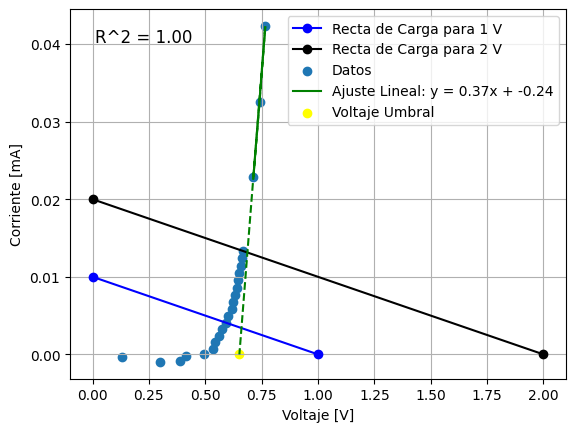

Pendiente (m): 0.3669559032716916
Ordenada al Origen (b): -0.2389473684210518
Voltaje Umbral: 0.6511609877117492


In [79]:
import matplotlib.pyplot as plt

# Define las coordenadas de los dos puntos
x1, y1 = 1, 0  # Coordenadas del primer punto
x2, y2 = 0, 0.01  # Coordenadas del segundo punto

# Crea una lista de las coordenadas X e Y de los dos puntos
x_coords = [x1, x2]
y_coords = [y1, y2]

# Trazar la recta entre los dos puntos
plt.plot(x_coords, y_coords, marker='o', linestyle='-',label=f'Recta de Carga para 1 V', color='b')

# Define las coordenadas de los dos puntos
x12, y12 = 2, 0  # Coordenadas del primer punto
x22, y22 = 0, 0.02  # Coordenadas del segundo punto

# Crea una lista de las coordenadas X e Y de los dos puntos
x_coords2 = [x12, x22]
y_coords2 = [y12, y22]

# Trazar la recta entre los dos puntos
plt.plot(x_coords2, y_coords2, marker='o', linestyle='-',label=f'Recta de Carga para 2 V', color='k')


# Etiquetas para los ejes
plt.xlabel('Eje X')
plt.ylabel('Eje Y')

# Mostrar el gráfico
plt.grid(True)

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# Carga los datos desde el archivo CSV
data = pd.read_csv('C:\\Users\\madro\\OneDrive\\Documents\\Python-\\electronica\\1Diodo.csv')

# Supongamos que tienes dos columnas llamadas 'ColumnaX' y 'ColumnaY'
x = data['V en el diodo']
y = data['Corriente']


# Definir un umbral para excluir ciertos datos
umbral = 0.7  # Cambia esto al valor que desees

# Filtrar los datos para excluir aquellos por debajo del umbral
x_filtrado = x[x >= umbral]
y_filtrado = y[x >= umbral]

# Realizar el ajuste lineal usando numpy en los datos filtrados
slope, intercept = np.polyfit(x_filtrado, y_filtrado, 1)

# Calcular el coeficiente de determinación (R cuadrado)
residuals = y_filtrado - (slope * x_filtrado + intercept)
ss_residual = np.sum(residuals**2)
ss_total = np.sum((y_filtrado - np.mean(y_filtrado))**2)
r_squared = 1 - (ss_residual / ss_total)

# Crear una función de ajuste lineal
fit_line = slope * x_filtrado + intercept

# Extender la recta de ajuste lineal hasta tocar el eje X
x_extendido = np.concatenate((x_filtrado, [x_interseccion]))
y_extendido = np.concatenate((y_filtrado, [0]))

# Graficar los datos originales, el ajuste lineal y la extensión de la recta hasta el eje X
plt.scatter(x, y, label='Datos')
plt.plot(x_filtrado, fit_line, color='green', label=f'Ajuste Lineal: y = {slope:.2f}x + {intercept:.2f}')
plt.plot(x_extendido, y_extendido, color='green', linestyle='--')

# Marcar el punto de intersección con el eje X
plt.scatter([x_interseccion], [0], color='yellow', marker='o', label='Voltaje Umbral')

# Agregar el valor del coeficiente de determinación al gráfico
plt.annotate(f'R^2 = {r_squared:.2f}', xy=(0.05, 0.91), xycoords='axes fraction', fontsize=12, color='black')

plt.xlabel('Voltaje [V]')
plt.ylabel('Corriente [mA]')
plt.legend()
plt.grid(True)
plt.show()

# Imprimir la pendiente y la ordenada al origen
print(f'Pendiente (m): {slope}')
print(f'Ordenada al Origen (b): {intercept}')
print(f'Voltaje Umbral: {x_interseccion}')



**calculo de constante de boltzman y Vt**

<>:36: SyntaxWarning: invalid escape sequence '\c'
<>:36: SyntaxWarning: invalid escape sequence '\c'
C:\Users\madro\AppData\Local\Temp\ipykernel_22328\2226694057.py:36: SyntaxWarning: invalid escape sequence '\c'
  plt.plot(V, linear_fit(V, *params), 'r-', label=f'Ajuste lineal: $ln(I) = {params[0]:.3f} \cdot V + {params[1]:.3f}$')


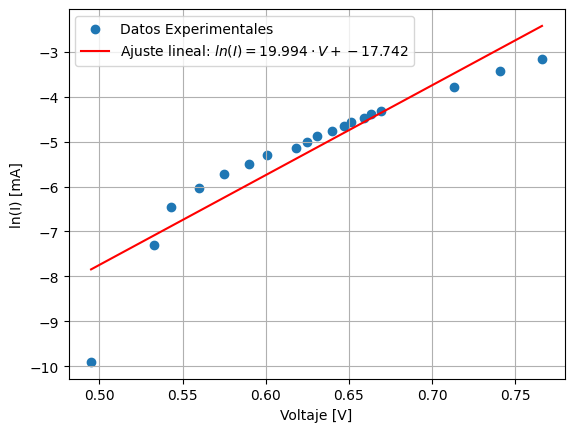

El voltaje térmico (VT) calculado es: 8.002e-21 V


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Cargar los datos desde el archivo CSV
df = pd.read_csv('C:\\Users\\madro\\.py\\Python-\\electronica\\Ln1Diodo.csv')

# Extraer las columnas relevantes
V = df['V en el diodo'].values
I = df['corriente'].values
T = df['Temperatura'].values



# Función para el ajuste lineal
def linear_fit(x, a, b):
    return a * x + b

# Realizar el ajuste lineal
lnI = np.log(I)
params, covariance = curve_fit(linear_fit, V, lnI)
slope = params[0]

# Constantes físicas
# Carga del electrón (C)
q= 1.6*10**(-19) #cgs


# Calcula el voltaje térmico (VT)
VT = q / slope


# Graficar los datos y la recta de ajuste lineal
plt.scatter(V, lnI, label='Datos Experimentales')
plt.plot(V, linear_fit(V, *params), 'r-', label=f'Ajuste lineal: $ln(I) = {params[0]:.3f} \cdot V + {params[1]:.3f}$')
plt.xlabel('Voltaje [V]')
plt.ylabel('ln(I) [mA]')
plt.legend()

# Muestra el valor de VT en la gráfica
plt.annotate(f'VT = {VT:.3e} V', xy=(0.05, -10), fontsize=12, color='black')

#equation_text = f'$ln(I) = {params[0]:.3f} \cdot V + {params[1]:.3f}$'
#plt.text(0.1, -15, equation_text, fontsize=12, color='blue')


plt.grid(True)
plt.show()

print(f'El voltaje térmico (VT) calculado es: {VT:.3e} V')
#print(f'kB es: {kB:.3e} V')

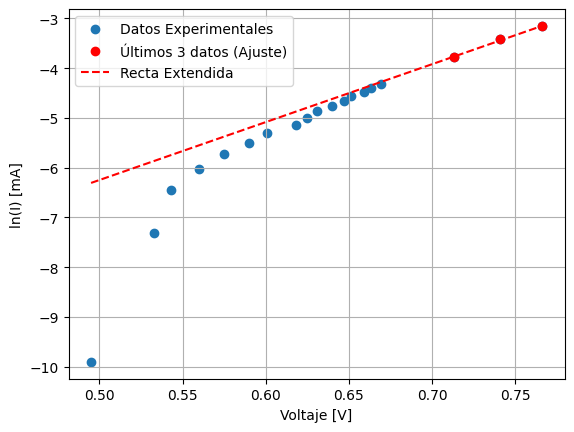

El voltaje térmico (VT) calculado es: 1.374e-20 V


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Cargar los datos desde el archivo CSV
df = pd.read_csv('C:\\Users\\madro\\.py\\Python-\\electronica\\Ln1Diodo.csv')

# Extraer las columnas relevantes
V = df['V en el diodo'].values
I = df['corriente'].values
T = df['Temperatura'].values

# Tomar solo los últimos tres datos
V_ultimos = V[-3:]
lnI_ultimos = np.log(I[-3:])

# Función para el ajuste lineal
def linear_fit(x, a, b):
    return a * x + b

# Realizar el ajuste lineal solo con los últimos tres datos
params_ultimos, covariance_ultimos = curve_fit(linear_fit, V_ultimos, lnI_ultimos)
slope_ultimos = params_ultimos[0]

# Constantes físicas
# Carga del electrón (C)
q = 1.6 * 10**(-19)  # cgs

# Calcula el voltaje térmico (VT)
VT_ultimos = q / slope_ultimos

# Extiende la recta de ajuste lineal
V_extendido = np.linspace(min(V), max(V), 100)
lnI_extendido = linear_fit(V_extendido, *params_ultimos)

# Graficar los datos y la recta de ajuste lineal
plt.scatter(V, np.log(I), label='Datos Experimentales')
plt.plot(V_ultimos, lnI_ultimos, 'ro', label='Últimos 3 datos (Ajuste)')
plt.plot(V_extendido, lnI_extendido, 'r--', label='Recta Extendida')
plt.xlabel('Voltaje [V]')
plt.ylabel('ln(I) [mA]')
plt.legend()

# Muestra el valor de VT en la gráfica
plt.annotate(f'VT = {VT_ultimos:.3e} V', xy=(0.05, -10), fontsize=12, color='black')

plt.grid(True)
plt.show()

print(f'El voltaje térmico (VT) calculado es: {VT_ultimos:.3e} V')


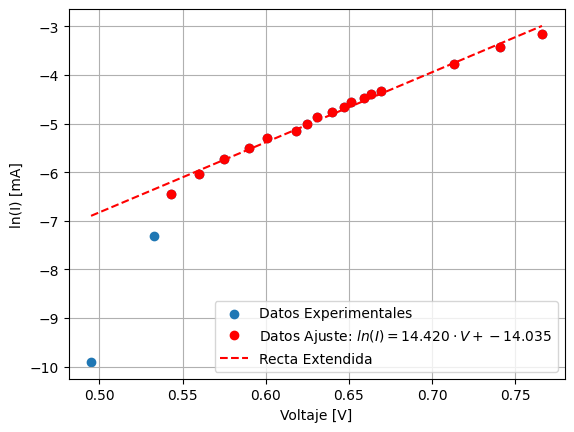

El voltaje térmico (VT) calculado es: 1.110e-20 V


In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Cargar los datos desde el archivo CSV
df = pd.read_csv('C:\\Users\\madro\\.py\\Python-\\electronica\\Ln1Diodo.csv')

# Extraer las columnas relevantes
V = df['V en el diodo'].values
I = df['corriente'].values
T = df['Temperatura'].values

# Tomar solo los últimos tres datos
V_ultimos = V[-17:]
lnI_ultimos = np.log(I[-17:])

# Función para el ajuste lineal
def linear_fit(x, a, b):
    return a * x + b

# Realizar el ajuste lineal solo con los últimos tres datos
params_ultimos, covariance_ultimos = curve_fit(linear_fit, V_ultimos, lnI_ultimos)
slope_ultimos = params_ultimos[0]

# Constantes físicas
# Carga del electrón (C)
q = 1.6 * 10**(-19)  # cgs

# Calcula el voltaje térmico (VT)
VT_ultimos = q / slope_ultimos

# Extiende la recta de ajuste lineal
V_extendido = np.linspace(min(V), max(V), 100)
lnI_extendido = linear_fit(V_extendido, *params_ultimos)

# Graficar los datos y la recta de ajuste lineal
plt.scatter(V, np.log(I), label='Datos Experimentales')
plt.plot(V_ultimos, lnI_ultimos, 'ro', label=fr'Datos Ajuste: $ln(I) = {params_ultimos[0]:.3f} \cdot V + {params_ultimos[1]:.3f}$')
plt.plot(V_extendido, lnI_extendido, 'r--', label='Recta Extendida')
plt.xlabel('Voltaje [V]')
plt.ylabel('ln(I) [mA]')
plt.legend()

# Muestra el valor de VT en la gráfica
plt.annotate(f'VT = {VT_ultimos:.3e} V', xy=(0.05, -10), fontsize=12, color='black')

plt.grid(True)
plt.show()

print(f'El voltaje térmico (VT) calculado es: {VT_ultimos:.3e} V')


In [39]:
from scipy.stats import linregress


# calculate the slope, intercept, r-value, p-value and std error of the slope
slope, intercept, r_value, p_value, std_err = linregress(V_extendido, lnI_extendido)

# calculate the coefficient of determination (R^2)
r2 = r_value**2

print("The coefficient of determination (R^2) is ", r2)

The coefficient of determination (R^2) is  1.0


8.029286349401216e-07


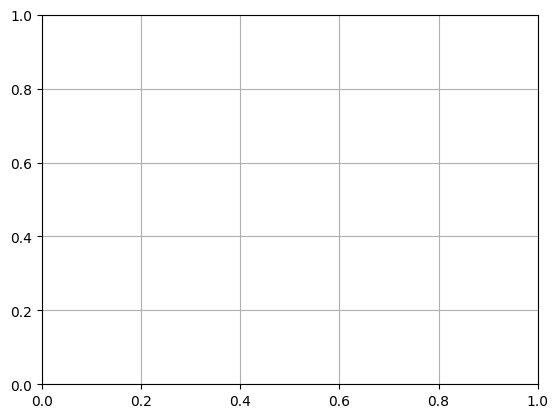

La corriente de saturación Is calculada es: 8.029e-07
El error de Is estimado es: 1.684e-06


In [50]:
Is=np.exp(-14.035)
print(Is)


params, cov_matrix = np.polyfit(V, lnI, 1, cov=True)
m, c = params
cov = cov_matrix[0, 0]  # Varianza de la pendiente m


# Calcula el error de Is mediante la propagación de errores
error_Is = Is * np.sqrt(cov)  # Error de Is


plt.annotate(f'Is = {Is:.3e} ± {error_Is:.3e}', xy=(0.3, -10), fontsize=12, color='black')

plt.grid(True)
plt.show()

print(f'La corriente de saturación Is calculada es: {Is:.3e}')
print(f'El error de Is estimado es: {error_Is:.3e}')


In [61]:
# Supongamos que ya tienes los valores de m y c del ajuste lineal

# Paso 1: Calcular V_T
V_T = 1 / slope_ultimos

# Paso 2: Calcular la carga del electrón (C)
q = -1.6e-19  # Suponiendo que q es la carga del electrón en Coulombs

# Paso 3: Calcular la constante de Boltzmann (k)
k = q / V_T

# Calcula el error de V_T y k mediante la propagación de errores
error_V_T = V_T ** 2 * np.sqrt(cov)  # Error de V_T
error_k = q * error_V_T / V_T ** 2  # Error de k

print (f'voltaje termico: {V_T:.3} +/- {error_V_T:.3}' )
print (f'constante de Boltzmann: {k:.3} +/- {error_k:.3}' )


voltaje termico: 0.0694 +/- 0.0101
constante de Boltzmann: -2.31e-18 +/- -3.36e-19


# *_Dos diodos en serie_* #

In [ ]:
import matplotlib.pyplot as plt

# Define las coordenadas de los dos puntos
x1, y1 = 3, 0  # Coordenadas del primer punto
x2, y2 = 0, 0.03  # Coordenadas del segundo punto

# Crea una lista de las coordenadas X e Y de los dos puntos
x_coords = [x1, x2]
y_coords = [y1, y2]

# Trazar la recta entre los dos puntos
plt.plot(x_coords, y_coords, marker='o', linestyle='-',label=f'Recta de Carga para 3 V', color='b')

# Define las coordenadas de los dos puntos
x12, y12 = 5, 0  # Coordenadas del primer punto
x22, y22 = 0, 0.05  # Coordenadas del segundo punto

# Crea una lista de las coordenadas X e Y de los dos puntos
x_coords2 = [x12, x22]
y_coords2 = [y12, y22]

# Trazar la recta entre los dos puntos
plt.plot(x_coords2, y_coords2, marker='o', linestyle='-',label=f'Recta de Carga para 5 V', color='k')


# Etiquetas para los ejes
plt.xlabel('Eje X')
plt.ylabel('Eje Y')

# Mostrar el gráfico
plt.grid(True)

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# Carga los datos desde el archivo CSV
data = pd.read_csv('C:\\Users\\madro\\OneDrive\\Documents\\Python-\\electronica\\1Diodo.csv')

# Supongamos que tienes dos columnas llamadas 'ColumnaX' y 'ColumnaY'
x = data['V en el diodo']
y = data['Corriente']


# Definir un umbral para excluir ciertos datos
umbral = 0.7  # Cambia esto al valor que desees

# Filtrar los datos para excluir aquellos por debajo del umbral
x_filtrado = x[x >= umbral]
y_filtrado = y[x >= umbral]

# Realizar el ajuste lineal usando numpy en los datos filtrados
slope, intercept = np.polyfit(x_filtrado, y_filtrado, 1)

# Calcular el coeficiente de determinación (R cuadrado)
residuals = y_filtrado - (slope * x_filtrado + intercept)
ss_residual = np.sum(residuals**2)
ss_total = np.sum((y_filtrado - np.mean(y_filtrado))**2)
r_squared = 1 - (ss_residual / ss_total)

# Crear una función de ajuste lineal
fit_line = slope * x_filtrado + intercept

# Extender la recta de ajuste lineal hasta tocar el eje X
x_extendido = np.concatenate((x_filtrado, [x_interseccion]))
y_extendido = np.concatenate((y_filtrado, [0]))

# Graficar los datos originales, el ajuste lineal y la extensión de la recta hasta el eje X
plt.scatter(x, y, label='Datos')
plt.plot(x_filtrado, fit_line, color='green', label=f'Ajuste Lineal: y = {slope:.2f}x + {intercept:.2f}')
plt.plot(x_extendido, y_extendido, color='green', linestyle='--')

# Marcar el punto de intersección con el eje X
plt.scatter([x_interseccion], [0], color='yellow', marker='o', label='Voltaje Umbral')

# Agregar el valor del coeficiente de determinación al gráfico
plt.annotate(f'R^2 = {r_squared:.2f}', xy=(0.05, 0.91), xycoords='axes fraction', fontsize=12, color='black')

plt.xlabel('Voltaje [V]')
plt.ylabel('Corriente [mA]')
plt.legend()
plt.grid(True)
plt.show()

# Imprimir la pendiente y la ordenada al origen
print(f'Pendiente (m): {slope}')
print(f'Ordenada al Origen (b): {intercept}')
print(f'Voltaje Umbral: {x_interseccion}')
